# Example for using fleet modeling in AeroMAPS

This notebook aims at using the classes dedicated to the fleet modelling that are used in AeroMAPS.

## Link with other AeroMAPS models

This fleet model can be used in AeroMAPS for improving the modeling of the fleet efficiency. For this purpose, a dedicated model is loaded, based on the bottom-up approach using fleet model. It replaces the basic top-down approach for modeling the evolution of the fleet efficiency, based on annual efficiency gains.

In [1]:
%matplotlib widget
from pathlib import Path

from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_without_fuel_effect,
    models_energy_cost,
    models_offset,
    models_emissions,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_energy_cost": models_energy_cost,
    "models_offset": models_offset,
    "models_emissions": models_emissions,
}

### Use the tutorial-specific configuration
This tutorial ships with `data/config.yaml`, which keeps the fleet YAML, aircraft inventory, and output files next to the notebook. Update that YAML (and the referenced YAML files) to explore alternative fleets.

In [ ]:
CONFIG_PATH = Path("data") / "config.yaml"

In [4]:
process = create_process(
    configuration_file=str(CONFIG_PATH),
    models=models,
)

 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.
 WARNING - 11:00:56: The Args section is missing.


In [5]:
process.parameters.prospection_start_year

2020

Here, an example using the previous fleet generated is performed with the AeroMAPS default float inputs. The hydrogen used for hydrogen aircraft is assumed to be produced via electrolysis using dedicated low-carbon electricity.

In [6]:
# Change end year
process.parameters.end_year = 2060
process.common_setup()
process.setup_mda()

 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.
 WARNING - 11:00:57: The Args section is missing.


In [7]:
# Hydrogen production
process.parameters.hydrogen_electrolysis_share_reference_years = []
process.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process.parameters.hydrogen_gas_ccs_share_reference_years = []
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0]
process.parameters.hydrogen_coal_ccs_share_reference_years = []
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0]
process.parameters.hydrogen_gas_share_reference_years = []
process.parameters.hydrogen_gas_share_reference_years_values = [0]
# Electricity emission factor
process.parameters.electricity_emission_factor_reference_years = []
process.parameters.electricity_emission_factor_reference_years_values = [20.0]

## Load and process

In [8]:
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

The fleet is divided into three main categories of aircraft, associated to an initial subcategory based on representative aircraft:
- Short range (Conventional narrow-body)
- Medium range (Conventional narrow-body)
- Long range (Conventional wide-body)

Lets now assemble these categories into a fleet object. By default, two new aircraft have been added to the initial subcategories, and two subcategories have also been added for Short Range (turboprop aircraft and hydrogen aircraft). Illustrative values are considered.

In [9]:
fleet = process.fleet
fleet_model = process.fleet_model

## Set up the fleet

### Inspect the configured fleet
`Fleet.pretty_print()` now highlights each category, its calibration references, and every additional aircraft defined in the YAML files. Pass `absolute=True` (optionally `reference="old"`) to convert the aircraft deltas into absolute values using the chosen reference aircraft as a baseline.

In [10]:
# Relative deltas (default display)
fleet.pretty_print()

print("\nAbsolute values vs recent reference:")
fleet.pretty_print(absolute=True)

Short Range (life=25y, limit=2, subcategories=3, share_sum=100.0%)
  - SR conventional narrow-body (share=20.0%, aircraft=2)
    - old reference (EIS=1970 y, energy/ASK=1.2472568306010927 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2009.0045994444736 y, energy/ASK=0.9478251366120218 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New Short-range Narrow-body 1 (DROP_IN_FUEL, EIS=2035y, cons=-15%, NOx=0%, soot=0%, DOC=0%)
    - New Short-range Narrow-body 2 (DROP_IN_FUEL, EIS=2045y, cons=-30%, NOx=0%, soot=0%, DOC=0%)
  - SR regional turboprop (share=30.0%, aircraft=2)
    - old reference (EIS=1970 y, energy/ASK=0.4390837438423645 MJ/ASK, DOC=0.026125 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2010.35 y, energy/ASK=0.3945777219416748 MJ/ASK, DOC=0.026125 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New Regional turboprop 1 (DROP_IN_FUEL, EIS=2030y, cons=-20%, NOx=0%, soot=0%,

'Short Range (life=25y, limit=2, subcategories=3, share_sum=100.0%)\n  - SR conventional narrow-body (share=20.0%, aircraft=2)\n    - old reference (EIS=1970 y, energy/ASK=1.2472568306010927 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)\n    - recent reference (EIS=2009.0045994444736 y, energy/ASK=0.9478251366120218 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)\n    - New Short-range Narrow-body 1 (DROP_IN_FUEL, EIS=2035y, energy/ASK=0.8057 MJ/ASK, DOC=0.04838 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)\n    - New Short-range Narrow-body 2 (DROP_IN_FUEL, EIS=2045y, energy/ASK=0.6635 MJ/ASK, DOC=0.04838 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)\n  - SR regional turboprop (share=30.0%, aircraft=2)\n    - old reference (EIS=1970 y, energy/ASK=0.4390837438423645 MJ/ASK, DOC=0.026125 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)\n    - recent reference (EIS=2010.35 y, energy/ASK=0.3945777219416748 MJ/ASK, DOC=0.026125 €/ASK, NOx=0.01514 kg/ASK

A dedicated configuration is now provided through the YAML files `fleet/config/aircraft_catalog.yaml` and `fleet/config/fleet.yaml`. Update those files (or point `Fleet` to custom copies) to change the future composition of the fleet: add subcategories, set their shares, and list the aircraft IDs assigned to each one. The helper cell below shows how to inspect the currently loaded configuration inside this notebook.

In [11]:
from pprint import pprint
from aeromaps.utils.yaml import read_yaml_file

fleet_config_path = process.fleet.fleet_config_path
print(f"Fleet configuration loaded from: {fleet_config_path}")
fleet_config = read_yaml_file(str(fleet_config_path))
short_range_cfg = next(cat for cat in fleet_config["categories"] if cat["id"] == "short_range")
pprint(short_range_cfg)

Fleet configuration loaded from: C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\notebooks\tutorials\use_the_fleet_model\data\fleet.yaml
{'id': 'short_range',
 'name': 'Short Range',
 'parameters': {'life': 25, 'limit': 2},
 'subcategories': ['sr_conventional_nb', 'sr_regional_tp', 'sr_hydrogen_nb']}


You can change fleet renewal rates for each category. The default value is 25 years.

In [12]:
fleet.categories["Medium Range"].parameters.life = 20

## Compute and results for the fleet model

Once the fleet has been chosen, the user can compute.

In [13]:
fleet_model.compute()

The user can then display the results.

In [14]:
fleet_model.df

,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:single_aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 1:single_aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 2:single_aircraft_share,Short Range:SR conventional narrow-body:recent_reference:single_aircraft_share,Short Range:SR conventional narrow-body:old_reference:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 2:single_aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:old_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 2:single_aircraft_share,Long Range:LR conventional wide-body:recent_reference:single_aircraft_share,Long Range:LR conventional wide-body:old_reference:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 2:single_aircraft_share,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 2:aircraft_share,Short Range:SR regional turboprop:New Regional turboprop 1:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 2:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 2:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 2:aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:energy_consumption,Short Range:SR conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR conventional narrow-body:energy_consumption:hydrogen,Short Range:SR conventional narrow-body:energy_consumption:electric,Short Range:SR conventional narrow-body:energy_consumption:hybrid_electric,Short Range:SR conventional narrow-body:share:total,Short Range:SR conventional narrow-body:share:dropin_fuel,Short Range:SR conventional narrow-body:share:hydrogen,Short Range:SR conventional narrow-body:share:electric,Short Range:SR conventional narrow-body:share:hybrid_electric,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:share:electric,Short Range:share:hybrid_electric,Short Range:SR regional turboprop:energy_consumption,Short Range:SR regional turboprop:energy_consumption:dropin_fuel,Short Range:SR regional turboprop:energy_consumption:hydrogen,Short Range:SR regional turboprop:energy_consumption:electric,Short Range:SR regional turboprop:energy_consumption:hybrid_electric,Short Range:SR regional turboprop:share:total,Short Range:SR regional turboprop:share:dropin_fuel,Short Range:SR regional turboprop:share:hydrogen,Short Range:SR regional turboprop:share:electric,Short Range:SR regional turboprop:share:hybrid_electric,Short Range:SR hydrogen conventional narrow-body:energy_consumption,Short Range:SR hydrogen conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR hydrogen conventional narrow-body:energy_consumption:hydrogen,Short Range:SR hydrogen conventional narrow-body:

More simply, the user can plot fleet renewal and its impact on energy consumption per ASK for each category.

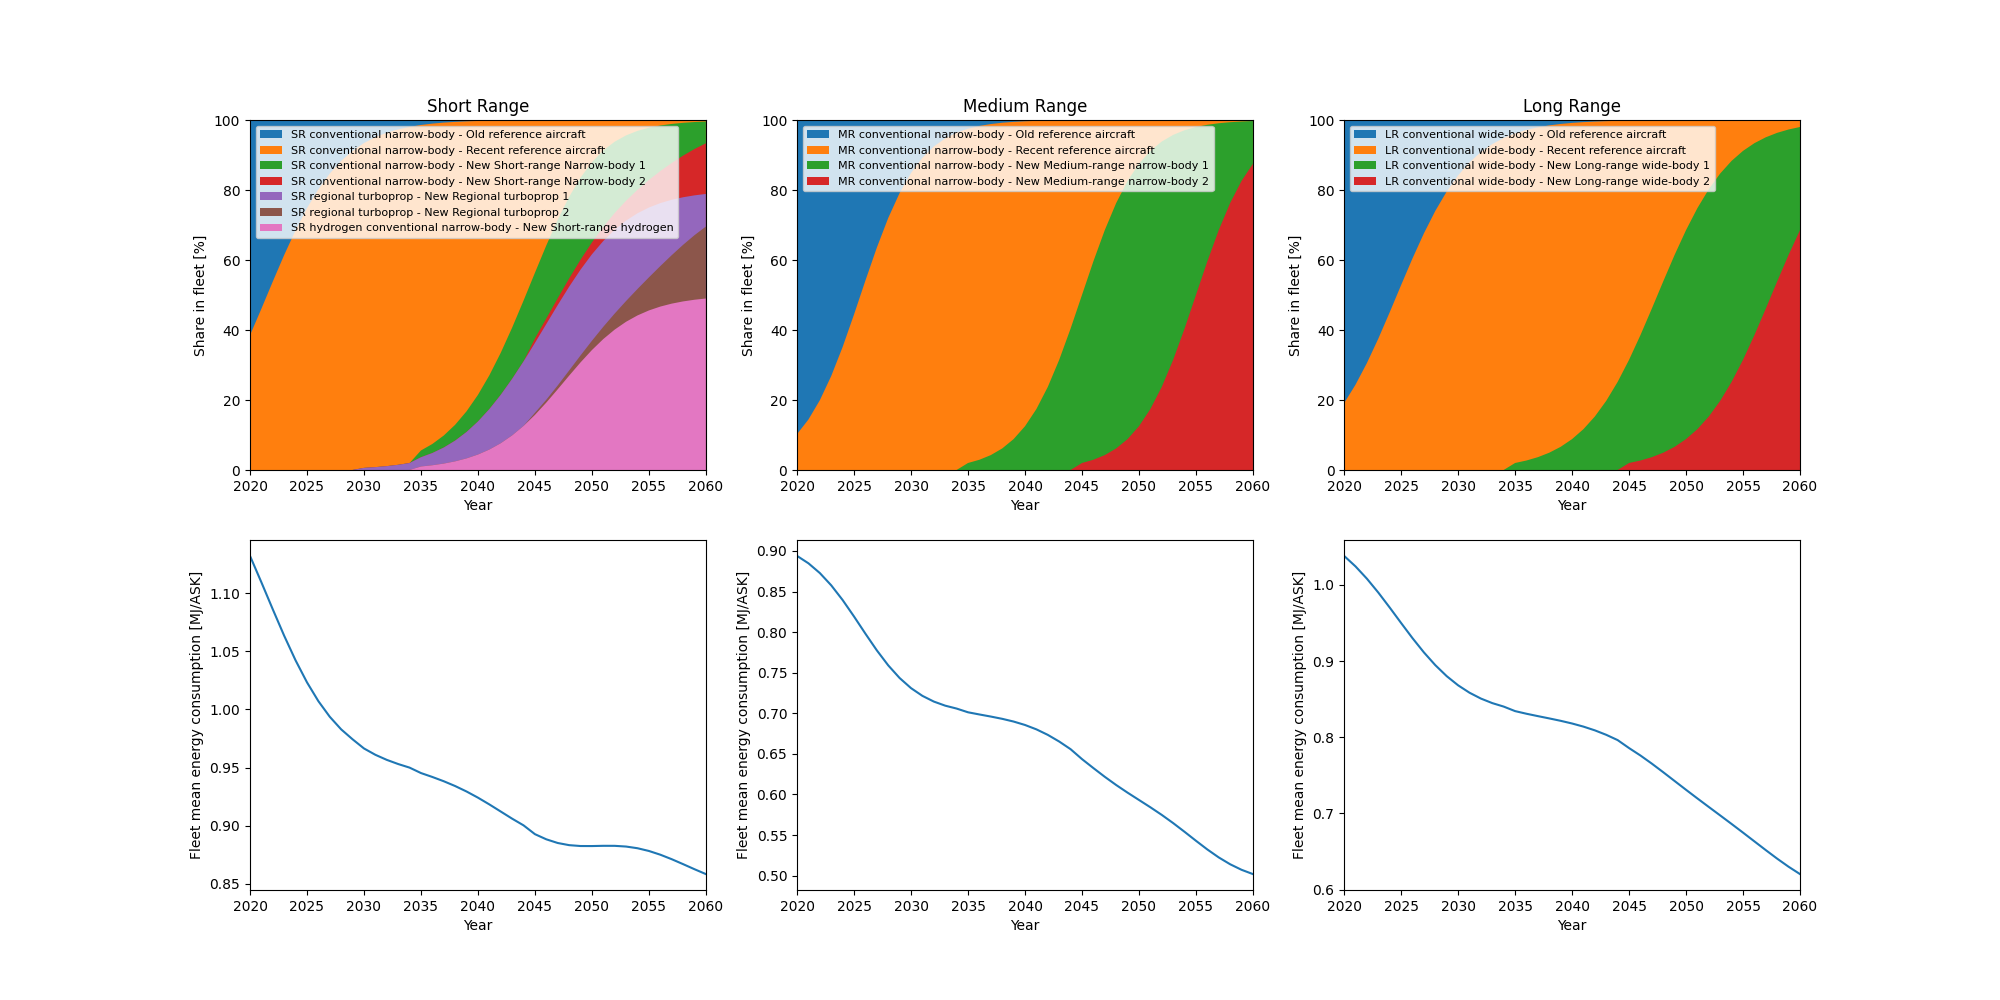

In [15]:
fleet_model.plot()

## Compute and results for the global model

The user can finally run the global model for studying a prospective scenario for air transport based on a hand-made fleet.

In [16]:
process.compute()
process.write_json()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: hefa_fog_mandate_share Warning]
The last reference year (2050) is lower than the end year (2060).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: hefa_others_mandate_share Warning]
The last reference year (2050) is lower than the end year (2060).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:158: UserWarning: 
[Interpolation Model: ft_msw_mandate_share Warning]
The last reference year (2050) is lower than the end year (2060).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.war

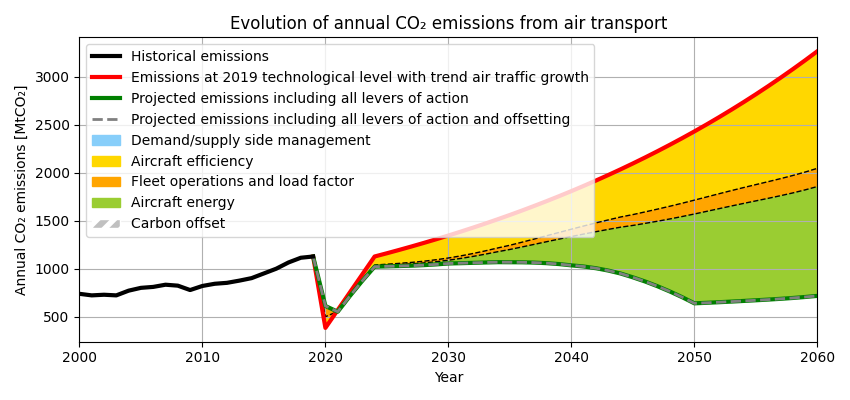

In [17]:
process.plot("air_transport_co2_emissions")

In [18]:
# Verify the outputs between .outputs.json and data/reference/outputs.json
from aeromaps.utils.functions import compare_json_files

files_are_different = compare_json_files(
    "./data/reference/outputs.json",
    "./data/outputs.json",
    rtol=0.0001,
    atol=0,
)

if files_are_different:
    raise ValueError("The outputs.json files are different.")

No differences found.


In [19]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())